In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import datetime
import pickle
from sklearn.externals import joblib

## Data Import

In [7]:
transactions_im = pd.read_csv('../../data/transactions_clean.csv', header=0)

### 3 methods of comparison
The data set includes stores that opened after the start of the time series. These stores generally saw a spike in transactions during their first few days followed by a leveling off to their long-term pattern. For our clustered prediction models we will be able to disregard when these stores first opened, but for clustering we need to compare them to the other time series.
## Method One - fill NaNs with 0

In [3]:
# 1 - fill NaNs with 0s for new stores
transactions = transactions_im.fillna(0)


### Zeros Elbow Curve

In [4]:
transactions = transactions.set_index('date').T

In [5]:
transactions.head()

date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15
1,2111.0,2111.0,1833.0,1863.0,1509.0,520.0,1807.0,1869.0,1910.0,1679.0,...,507.0,1665.0,1766.0,1766.0,1764.0,570.0,1004.0,416.0,1733.0,1693.0
2,2358.0,2358.0,2033.0,2066.0,2062.0,1992.0,1911.0,1856.0,1975.0,1761.0,...,1905.0,1700.0,1688.0,1786.0,1695.0,1698.0,1613.0,1658.0,1788.0,1737.0
3,3487.0,3487.0,3026.0,3188.0,3623.0,3590.0,2996.0,2826.0,2932.0,2649.0,...,3506.0,3046.0,2835.0,2962.0,2841.0,2991.0,3070.0,3075.0,3036.0,2956.0
4,1922.0,1922.0,1551.0,1596.0,1825.0,1891.0,1514.0,1397.0,1533.0,1326.0,...,1453.0,1231.0,1222.0,1325.0,1281.0,1301.0,1304.0,1378.0,1285.0,1283.0
5,1903.0,1903.0,1740.0,1642.0,1643.0,1754.0,1577.0,1504.0,1513.0,1449.0,...,1140.0,1348.0,1183.0,1275.0,1262.0,1183.0,1061.0,1098.0,1225.0,1310.0


In [6]:
# k means determine k
scores = []

for k in range(1,20):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(transactions)
    scores.append(kmeanModel.fit(transactions).score(transactions))

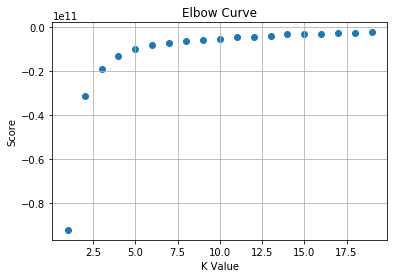

In [7]:
plt.close('all')
#plt.figure(figsize=(12,7))
plt.scatter(range(1,20), scores)
plt.grid()
plt.title('Elbow Curve')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.show()

The curve of the graph is at approximately k=5

### Checking the Clusters

In [8]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(transactions)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Add the cluster assignments

In [9]:
labels = kmeanModel.labels_

In [10]:
transactions['kcluster'] = labels
transactions['kcluster'].value_counts()

0    20
4    14
3     7
2     7
1     6
Name: kcluster, dtype: int64

#### Reshape the data for plotting

In [11]:
transactions0 = transactions[transactions['kcluster']==0].drop('kcluster', axis=1)
transactions1 = transactions[transactions['kcluster']==1].drop('kcluster', axis=1)
transactions2 = transactions[transactions['kcluster']==2].drop('kcluster', axis=1)
transactions3 = transactions[transactions['kcluster']==3].drop('kcluster', axis=1)
transactions4 = transactions[transactions['kcluster']==4].drop('kcluster', axis=1)

transactions0 = transactions0.T
transactions1 = transactions1.T
transactions2 = transactions2.T
transactions3 = transactions3.T
transactions4 = transactions4.T

format = '%Y-%m-%d'
transactions0['date'] = transactions0.index.values
transactions0['date'] = transactions0['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions0 = transactions0.set_index('date')

transactions1['date'] = transactions1.index.values
transactions1['date'] = transactions1['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions1 = transactions1.set_index('date')

transactions2['date'] = transactions2.index.values
transactions2['date'] = transactions2['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions2 = transactions2.set_index('date')

transactions3['date'] = transactions3.index.values
transactions3['date'] = transactions3['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions3 = transactions3.set_index('date')

transactions4['date'] = transactions4.index.values
transactions4['date'] = transactions4['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions4 = transactions4.set_index('date')

In [12]:
transactions0['mean'] = transactions0.mean(axis=1)
transactions1['mean'] = transactions1.mean(axis=1)
transactions2['mean'] = transactions2.mean(axis=1)
transactions3['mean'] = transactions3.mean(axis=1)
transactions4['mean'] = transactions4.mean(axis=1)

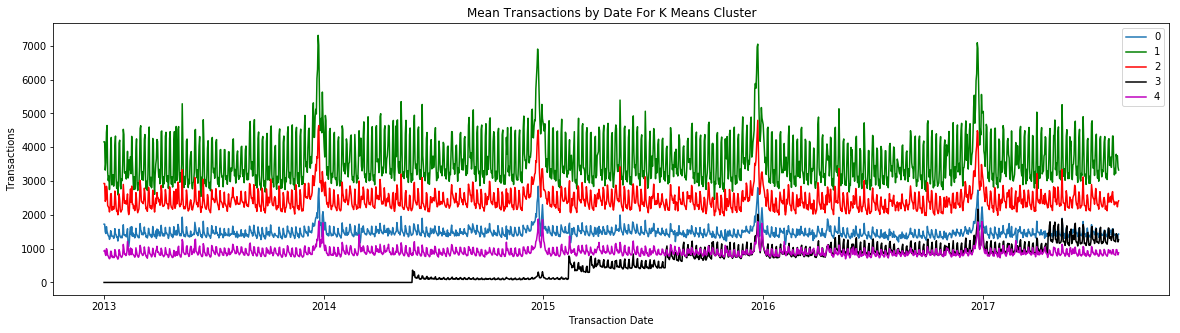

In [13]:
# Plot the results
plt.close('all')
plt.figure(figsize=(20,5))
plt.plot(transactions0.index.values, transactions0['mean'], label='0')
plt.plot(transactions1.index.values, transactions1['mean'], color='g', label='1')
plt.plot(transactions2.index.values, transactions2['mean'], color='r', label='2')
plt.plot(transactions3.index.values, transactions3['mean'], color='k', label='3')
plt.plot(transactions4.index.values, transactions4['mean'], color='m', label='4')

plt.title('Mean Transactions by Date For K Means Cluster')
plt.xlabel('Transaction Date')
plt.ylabel('Transactions')

plt.legend()
plt.show()

## Method 2 - Interpolation

In [14]:
# 2 - interpolate NaNs for new stores
for i in range(1, 54):
    transactions_im[str(i)] = transactions_im[str(i)].interpolate(method='linear').bfill().ffill()


### Elbow Curve

In [15]:
transactions_im = transactions_im.set_index('date').T

In [16]:
# k means determine k
scores2 = []

for k in range(1,20):
    kmeanModel2 = KMeans(n_clusters=k)
    kmeanModel2.fit(transactions_im)
    scores2.append(kmeanModel2.fit(transactions_im).score(transactions_im))

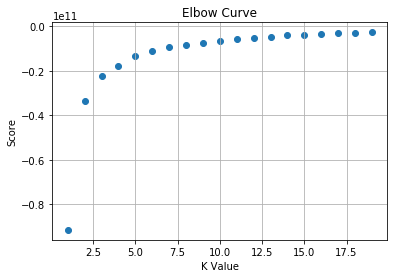

In [17]:
plt.close('all')
#plt.figure(figsize=(12,7))
plt.scatter(range(1,20), scores2)
plt.grid()
plt.title('Elbow Curve')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.show()

Again, the optimal number of clusters is around 5

### Checking the Clusters

In [18]:
kmeanModel2 = KMeans(n_clusters=5)
kmeanModel2.fit(transactions_im)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
labels = kmeanModel2.labels_
transactions_im['kcluster'] = labels
transactions_im['kcluster'].value_counts()

0    24
3    14
4     7
1     7
2     2
Name: kcluster, dtype: int64

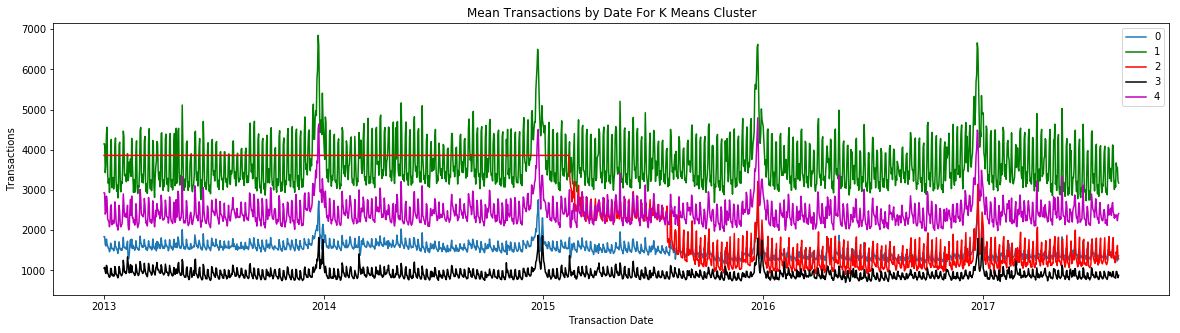

In [20]:
transactions0 = transactions_im[transactions_im['kcluster']==0].drop('kcluster', axis=1)
transactions1 = transactions_im[transactions_im['kcluster']==1].drop('kcluster', axis=1)
transactions2 = transactions_im[transactions_im['kcluster']==2].drop('kcluster', axis=1)
transactions3 = transactions_im[transactions_im['kcluster']==3].drop('kcluster', axis=1)
transactions4 = transactions_im[transactions_im['kcluster']==4].drop('kcluster', axis=1)

transactions0 = transactions0.T
transactions1 = transactions1.T
transactions2 = transactions2.T
transactions3 = transactions3.T
transactions4 = transactions4.T

format = '%Y-%m-%d'
transactions0['date'] = transactions0.index.values
transactions0['date'] = transactions0['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions0 = transactions0.set_index('date')

transactions1['date'] = transactions1.index.values
transactions1['date'] = transactions1['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions1 = transactions1.set_index('date')

transactions2['date'] = transactions2.index.values
transactions2['date'] = transactions2['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions2 = transactions2.set_index('date')

transactions3['date'] = transactions3.index.values
transactions3['date'] = transactions3['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions3 = transactions3.set_index('date')

transactions4['date'] = transactions4.index.values
transactions4['date'] = transactions4['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions4 = transactions4.set_index('date')

transactions0['mean'] = transactions0.mean(axis=1)
transactions1['mean'] = transactions1.mean(axis=1)
transactions2['mean'] = transactions2.mean(axis=1)
transactions3['mean'] = transactions3.mean(axis=1)
transactions4['mean'] = transactions4.mean(axis=1)

# Plot the results
plt.close('all')
plt.figure(figsize=(20,5))
plt.plot(transactions0.index.values, transactions0['mean'], label='0')
plt.plot(transactions1.index.values, transactions1['mean'], color='g', label='1')
plt.plot(transactions2.index.values, transactions2['mean'], color='r', label='2')
plt.plot(transactions3.index.values, transactions3['mean'], color='k', label='3')
plt.plot(transactions4.index.values, transactions4['mean'], color='m', label='4')

plt.title('Mean Transactions by Date For K Means Cluster')
plt.xlabel('Transaction Date')
plt.ylabel('Transactions')

plt.legend()
plt.show()

## Compare the two methods

In [23]:
labels1 = kmeanModel.labels_
labels2 = kmeanModel2.labels_

compare = pd.DataFrame({'store': transactions.index.values, 'labels1': labels1, 'labels2': labels2})

pd.crosstab(compare['labels1'],compare['labels2'])

labels2,0,1,2,3,4
labels1,,,,,
0,20,0,0,0,0
1,0,6,0,0,0
2,0,0,0,0,7
3,4,1,2,0,0
4,0,0,0,14,0


In [24]:
c = compare[compare['labels1']==3]
c

,labels1,labels2,store
19,3,2,20
20,3,2,21
21,3,0,22
28,3,0,29
41,3,0,42
51,3,1,52
52,3,0,53


In [25]:
stores = ['20','21','22','29','42','52','53']
t = transactions.loc[stores,:]
t

date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,kcluster
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1525.0,1543.0,1416.0,1520.0,1751.0,1664.0,1834.0,1522.0,1516.0,3
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1052.0,1112.0,965.0,882.0,1165.0,1119.0,1403.0,1045.0,1059.0,3
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,724.0,730.0,734.0,730.0,701.0,888.0,701.0,794.0,766.0,3
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1145.0,1218.0,1051.0,1040.0,1199.0,1196.0,1298.0,1031.0,1302.0,3
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1086.0,1026.0,1063.0,1083.0,1055.0,1019.0,932.0,1027.0,995.0,3
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2152.0,1997.0,2300.0,2165.0,2957.0,2804.0,2433.0,2074.0,2255.0,3
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1009.0,977.0,1084.0,994.0,1272.0,1212.0,1164.0,895.0,932.0,3


In [26]:
storeslist = pd.read_csv('stores.csv', header=0)
storeslist['store'] = storeslist['store_nbr'].map(lambda a: int(a))
storeslist.drop('store_nbr', axis=1, inplace=True)

In [27]:
compare['store'] = compare['store'].map(lambda a: int(a))
compare = compare.merge(storeslist, on='store', how='left')

In [28]:
compare

,labels1,labels2,store,city,state,type,cluster
0,0,0,1,Quito,Pichincha,D,13
1,0,0,2,Quito,Pichincha,D,13
2,1,1,3,Quito,Pichincha,D,8
3,0,0,4,Quito,Pichincha,D,9
4,0,0,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,0,0,6,Quito,Pichincha,D,13
6,0,0,7,Quito,Pichincha,D,8
7,2,4,8,Quito,Pichincha,D,8
8,2,4,9,Quito,Pichincha,B,6
9,4,3,10,Quito,Pichincha,C,15


In [29]:
compare.loc[compare['store'].isin(stores),:]

,labels1,labels2,store,city,state,type,cluster
19,3,2,20,Quito,Pichincha,B,6
20,3,2,21,Santo Domingo,Santo Domingo de los Tsachilas,B,6
21,3,0,22,Puyo,Pastaza,C,7
28,3,0,29,Guayaquil,Guayas,E,10
41,3,0,42,Cuenca,Azuay,D,2
51,3,1,52,Manta,Manabi,A,11
52,3,0,53,Manta,Manabi,D,13


### Method 3 - Drop NaNs
Since the previous methods are consistently creating a cluster of the new stores, we are instead going to use only the dates that all stores were open for. The newest store opened on 2017-04-20. We will drop all dates prior to then and cluster based on equivalent series.

In [30]:
transactions_new = pd.read_csv('transactions_clean.csv', header=0)

In [31]:
transactions_new.dropna(inplace=True)
transactions_new.head()

,date,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
1570,2017-04-20,1579.0,1715.0,2808.0,1159.0,1124.0,1547.0,1700.0,2475.0,1929.0,...,3255.0,3078.0,3476.0,2509.0,2750.0,2051.0,1409.0,4068.0,948.0,649.0
1571,2017-04-21,1958.0,1950.0,3439.0,1461.0,1195.0,1744.0,2095.0,3024.0,1873.0,...,3934.0,3353.0,3836.0,2686.0,3175.0,2413.0,1726.0,3151.0,1112.0,729.0
1572,2017-04-22,1338.0,2006.0,3718.0,1531.0,1207.0,1924.0,1949.0,2995.0,2249.0,...,4600.0,4346.0,4411.0,3532.0,3507.0,3136.0,1760.0,4046.0,1215.0,828.0
1573,2017-04-23,518.0,1968.0,3648.0,1667.0,1107.0,2114.0,1730.0,2864.0,2247.0,...,4676.0,4768.0,4842.0,4088.0,3628.0,3251.0,1892.0,4209.0,1210.0,918.0
1574,2017-04-24,1632.0,1737.0,2754.0,1148.0,1208.0,1461.0,1779.0,2520.0,1867.0,...,3347.0,3011.0,3249.0,2421.0,2763.0,2304.0,1433.0,2682.0,1003.0,805.0


In [32]:
transactions_new = transactions_new.set_index('date').T

In [33]:
# k means determine k
scores = []

for k in range(1,20):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(transactions_new)
    scores.append(kmeanModel.fit(transactions_new).score(transactions_new))

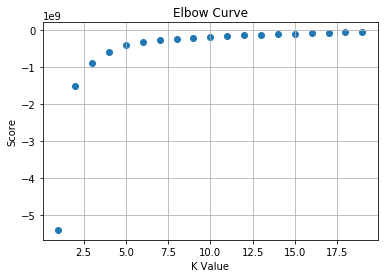

In [34]:
plt.close('all')
#plt.figure(figsize=(12,7))
plt.scatter(range(1,20), scores)
plt.grid()
plt.title('Elbow Curve')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.show()

In [35]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(transactions_new)
labels = kmeanModel.labels_
transactions_new['kcluster'] = labels
transactions_new['kcluster'].value_counts()

0    25
4    12
3     8
1     5
2     4
Name: kcluster, dtype: int64

In [36]:
kmeanModel2 = KMeans(n_clusters=4)
kmeanModel2.fit(transactions_new)
labels = kmeanModel2.labels_
transactions_new['kcluster4'] = labels
transactions_new['kcluster4'].value_counts()

0    24
3    19
2     7
1     4
Name: kcluster4, dtype: int64

In [37]:
kmeanModel3 = KMeans(n_clusters=6)
kmeanModel3.fit(transactions_new)
labels = kmeanModel3.labels_
transactions_new['kcluster6'] = labels
transactions_new['kcluster6'].value_counts()

2    21
0    12
5     7
4     5
1     5
3     4
Name: kcluster6, dtype: int64

In [42]:
labels = kmeanModel.labels_
transactions_im['kcluster5'] = labels
transactions_im['kcluster5'].value_counts()

0    25
4    12
3     8
1     5
2     4
Name: kcluster5, dtype: int64

In [45]:
#transactions_im = transactions_im.set_index('date').T
transactions_im['kcluster5'] = kmeanModel.labels_

transactions0 = transactions_im[transactions_im['kcluster5']==0].drop('kcluster5', axis=1)
transactions1 = transactions_im[transactions_im['kcluster5']==1].drop('kcluster5', axis=1)
transactions2 = transactions_im[transactions_im['kcluster5']==2].drop('kcluster5', axis=1)
transactions3 = transactions_im[transactions_im['kcluster5']==3].drop('kcluster5', axis=1)
transactions4 = transactions_im[transactions_im['kcluster5']==4].drop('kcluster5', axis=1)

transactions0 = transactions0.T
transactions1 = transactions1.T
transactions2 = transactions2.T
transactions3 = transactions3.T
transactions4 = transactions4.T

format = '%Y-%m-%d'
transactions0['date'] = transactions0.index.values
transactions0['date'] = transactions0['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions0 = transactions0.set_index('date')

transactions1['date'] = transactions1.index.values
transactions1['date'] = transactions1['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions1 = transactions1.set_index('date')

transactions2['date'] = transactions2.index.values
transactions2['date'] = transactions2['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions2 = transactions2.set_index('date')

transactions3['date'] = transactions3.index.values
transactions3['date'] = transactions3['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions3 = transactions3.set_index('date')

transactions4['date'] = transactions4.index.values
transactions4['date'] = transactions4['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions4 = transactions4.set_index('date')

transactions0['mean'] = transactions0.mean(axis=1)
transactions1['mean'] = transactions1.mean(axis=1)
transactions2['mean'] = transactions2.mean(axis=1)
transactions3['mean'] = transactions3.mean(axis=1)
transactions4['mean'] = transactions4.mean(axis=1)

# Plot the results
plt.close('all')
plt.figure(figsize=(20,5))
plt.plot(transactions0.index.values, transactions0['mean'], label='0')
plt.plot(transactions1.index.values, transactions1['mean'], color='g', label='1')
plt.plot(transactions2.index.values, transactions2['mean'], color='r', label='2')
plt.plot(transactions3.index.values, transactions3['mean'], color='k', label='3')
plt.plot(transactions4.index.values, transactions4['mean'], color='m', label='4')

plt.title('Mean Transactions by Date For K Means Cluster')
plt.xlabel('Transaction Date')
plt.ylabel('Transactions')

plt.legend()
plt.show()

ValueError: time data 'kcluster' does not match format '%Y-%m-%d'

In [45]:
transactions_im['kcluster6'] = kmeanModel3.labels_

transactions0 = transactions_im[transactions_im['kcluster6']==0].drop('kcluster6', axis=1).drop('kcluster5', axis=1)
transactions1 = transactions_im[transactions_im['kcluster6']==1].drop('kcluster6', axis=1).drop('kcluster5', axis=1)
transactions2 = transactions_im[transactions_im['kcluster6']==2].drop('kcluster6', axis=1).drop('kcluster5', axis=1)
transactions3 = transactions_im[transactions_im['kcluster6']==3].drop('kcluster6', axis=1).drop('kcluster5', axis=1)
transactions4 = transactions_im[transactions_im['kcluster6']==4].drop('kcluster6', axis=1).drop('kcluster5', axis=1)
transactions5 = transactions_im[transactions_im['kcluster6']==5].drop('kcluster6', axis=1).drop('kcluster5', axis=1)

transactions0 = transactions0.T
transactions1 = transactions1.T
transactions2 = transactions2.T
transactions3 = transactions3.T
transactions4 = transactions4.T
transactions5 = transactions5.T

format = '%Y-%m-%d'
transactions0['date'] = transactions0.index.values
transactions0['date'] = transactions0['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions0 = transactions0.set_index('date')

transactions1['date'] = transactions1.index.values
transactions1['date'] = transactions1['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions1 = transactions1.set_index('date')

transactions2['date'] = transactions2.index.values
transactions2['date'] = transactions2['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions2 = transactions2.set_index('date')

transactions3['date'] = transactions3.index.values
transactions3['date'] = transactions3['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions3 = transactions3.set_index('date')

transactions4['date'] = transactions4.index.values
transactions4['date'] = transactions4['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions4 = transactions4.set_index('date')

transactions5['date'] = transactions5.index.values
transactions5['date'] = transactions5['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions5 = transactions5.set_index('date')

transactions0['mean'] = transactions0.mean(axis=1)
transactions1['mean'] = transactions1.mean(axis=1)
transactions2['mean'] = transactions2.mean(axis=1)
transactions3['mean'] = transactions3.mean(axis=1)
transactions4['mean'] = transactions4.mean(axis=1)
transactions5['mean'] = transactions5.mean(axis=1)

# Plot the results
plt.close('all')
plt.figure(figsize=(20,5))
plt.plot(transactions0.index.values, transactions0['mean'], label='0')
plt.plot(transactions1.index.values, transactions1['mean'], color='c', label='1')
plt.plot(transactions2.index.values, transactions2['mean'], color='r', label='2')
plt.plot(transactions3.index.values, transactions3['mean'], color='y', label='3')
plt.plot(transactions4.index.values, transactions4['mean'], color='m', label='4')
plt.plot(transactions5.index.values, transactions5['mean'], color='g', label='5')

plt.title('Mean Transactions by Date For K Means Cluster')
plt.xlabel('Transaction Date')
plt.ylabel('Transactions')

plt.legend()
plt.show()

ValueError: labels ['kcluster5'] not contained in axis

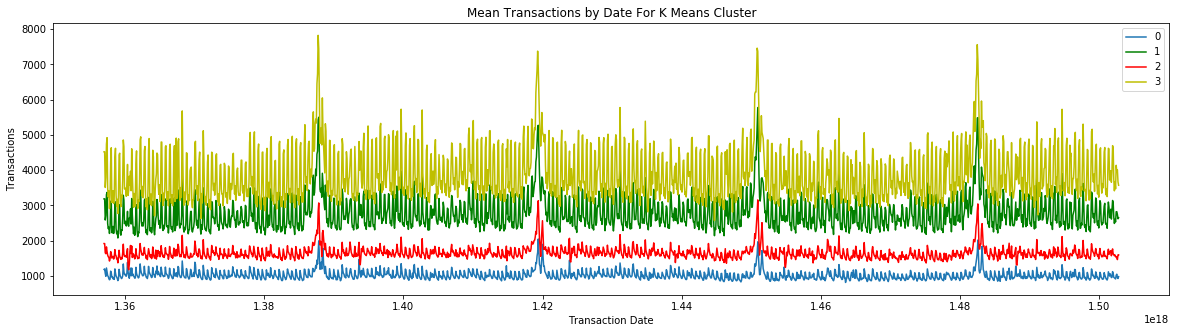

In [20]:
transactions_im['kcluster4'] = kmeanModel2.labels_

transactions0 = transactions_im[transactions_im['kcluster4']==0].drop('kcluster4', axis=1).drop('kcluster5', axis=1).drop('kcluster6', axis=1)
transactions1 = transactions_im[transactions_im['kcluster4']==1].drop('kcluster4', axis=1).drop('kcluster5', axis=1).drop('kcluster6', axis=1)
transactions2 = transactions_im[transactions_im['kcluster4']==2].drop('kcluster4', axis=1).drop('kcluster5', axis=1).drop('kcluster6', axis=1)
transactions3 = transactions_im[transactions_im['kcluster4']==3].drop('kcluster4', axis=1).drop('kcluster5', axis=1).drop('kcluster6', axis=1)

transactions0 = transactions0.T
transactions1 = transactions1.T
transactions2 = transactions2.T
transactions3 = transactions3.T

format = '%Y-%m-%d'
transactions0['date'] = transactions0.index.values
transactions0['date'] = transactions0['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions0 = transactions0.set_index('date')

transactions1['date'] = transactions1.index.values
transactions1['date'] = transactions1['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions1 = transactions1.set_index('date')

transactions2['date'] = transactions2.index.values
transactions2['date'] = transactions2['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions2 = transactions2.set_index('date')

transactions3['date'] = transactions3.index.values
transactions3['date'] = transactions3['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions3 = transactions3.set_index('date')

transactions0['mean'] = transactions0.mean(axis=1)
transactions1['mean'] = transactions1.mean(axis=1)
transactions2['mean'] = transactions2.mean(axis=1)
transactions3['mean'] = transactions3.mean(axis=1)

# Plot the results
plt.close('all')
plt.figure(figsize=(20,5))
plt.plot(transactions0.index.values, transactions0['mean'], label='0')
plt.plot(transactions1.index.values, transactions1['mean'], color='g', label='1')
plt.plot(transactions2.index.values, transactions2['mean'], color='r', label='2')
plt.plot(transactions3.index.values, transactions3['mean'], color='y', label='3')

plt.title('Mean Transactions by Date For K Means Cluster')
plt.xlabel('Transaction Date')
plt.ylabel('Transactions')

plt.legend()
plt.show()

In [23]:
pd.crosstab(transactions_im['kcluster5'], transactions_im['kcluster6'])

kcluster6,0,1,2,3,4,5
kcluster5,,,,,,
0,0,0,4,0,0,5
1,12,0,0,0,0,0
2,0,5,0,0,0,0
3,0,0,7,0,17,0
4,0,0,0,4,0,0


In [24]:
stores = ['20','21','22','29','42','52','53']
t = transactions_im.loc[stores, :]

In [25]:
t

date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,kcluster5,kcluster6,kcluster4
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1416.0,1520.0,1751.0,1664.0,1834.0,1522.0,1516.0,3,2,2
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,965.0,882.0,1165.0,1119.0,1403.0,1045.0,1059.0,3,4,0
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,734.0,730.0,701.0,888.0,701.0,794.0,766.0,1,0,0
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1051.0,1040.0,1199.0,1196.0,1298.0,1031.0,1302.0,3,4,0
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1063.0,1083.0,1055.0,1019.0,932.0,1027.0,995.0,3,4,0
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2300.0,2165.0,2957.0,2804.0,2433.0,2074.0,2255.0,0,5,1
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1084.0,994.0,1272.0,1212.0,1164.0,895.0,932.0,3,4,0


In [47]:
kmeanModel3 = KMeans(n_clusters=6, max_iter=600)
kmeanModel3.fit(transactions_new)
labels = kmeanModel3.labels_
transactions_new['kcluster6'] = labels
transactions_new['kcluster6'].value_counts()

0    19
3    12
4     9
5     5
2     5
1     4
Name: kcluster6, dtype: int64

In [48]:
transactions_im['kcluster6'] = kmeanModel3.labels_

transactions0 = transactions_im[transactions_im['kcluster6']==0].drop('kcluster6', axis=1).drop('kcluster5', axis=1).drop('kcluster4', axis=1)
transactions1 = transactions_im[transactions_im['kcluster6']==1].drop('kcluster6', axis=1).drop('kcluster5', axis=1).drop('kcluster4', axis=1)
transactions2 = transactions_im[transactions_im['kcluster6']==2].drop('kcluster6', axis=1).drop('kcluster5', axis=1).drop('kcluster4', axis=1)
transactions3 = transactions_im[transactions_im['kcluster6']==3].drop('kcluster6', axis=1).drop('kcluster5', axis=1).drop('kcluster4', axis=1)
transactions4 = transactions_im[transactions_im['kcluster6']==4].drop('kcluster6', axis=1).drop('kcluster5', axis=1).drop('kcluster4', axis=1)
transactions5 = transactions_im[transactions_im['kcluster6']==5].drop('kcluster6', axis=1).drop('kcluster5', axis=1).drop('kcluster4', axis=1)

transactions0 = transactions0.T
transactions1 = transactions1.T
transactions2 = transactions2.T
transactions3 = transactions3.T
transactions4 = transactions4.T
transactions5 = transactions5.T

format = '%Y-%m-%d'
transactions0['date'] = transactions0.index.values
transactions0['date'] = transactions0['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions0 = transactions0.set_index('date')

transactions1['date'] = transactions1.index.values
transactions1['date'] = transactions1['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions1 = transactions1.set_index('date')

transactions2['date'] = transactions2.index.values
transactions2['date'] = transactions2['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions2 = transactions2.set_index('date')

transactions3['date'] = transactions3.index.values
transactions3['date'] = transactions3['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions3 = transactions3.set_index('date')

transactions4['date'] = transactions4.index.values
transactions4['date'] = transactions4['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions4 = transactions4.set_index('date')

transactions5['date'] = transactions5.index.values
transactions5['date'] = transactions5['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
transactions5 = transactions5.set_index('date')

transactions0['mean'] = transactions0.mean(axis=1)
transactions1['mean'] = transactions1.mean(axis=1)
transactions2['mean'] = transactions2.mean(axis=1)
transactions3['mean'] = transactions3.mean(axis=1)
transactions4['mean'] = transactions4.mean(axis=1)
transactions5['mean'] = transactions5.mean(axis=1)

# Plot the results
plt.close('all')
plt.figure(figsize=(20,5))
plt.plot(transactions0.index.values, transactions0['mean'], label='0')
plt.plot(transactions1.index.values, transactions1['mean'], color='c', label='1')
plt.plot(transactions2.index.values, transactions2['mean'], color='r', label='2')
plt.plot(transactions3.index.values, transactions3['mean'], color='y', label='3')
plt.plot(transactions4.index.values, transactions4['mean'], color='m', label='4')
plt.plot(transactions5.index.values, transactions5['mean'], color='g', label='5')

plt.title('Mean Transactions by Date For K Means Cluster')
plt.xlabel('Transaction Date')
plt.ylabel('Transactions')

plt.legend()
plt.show()

ValueError: labels ['kcluster5'] not contained in axis

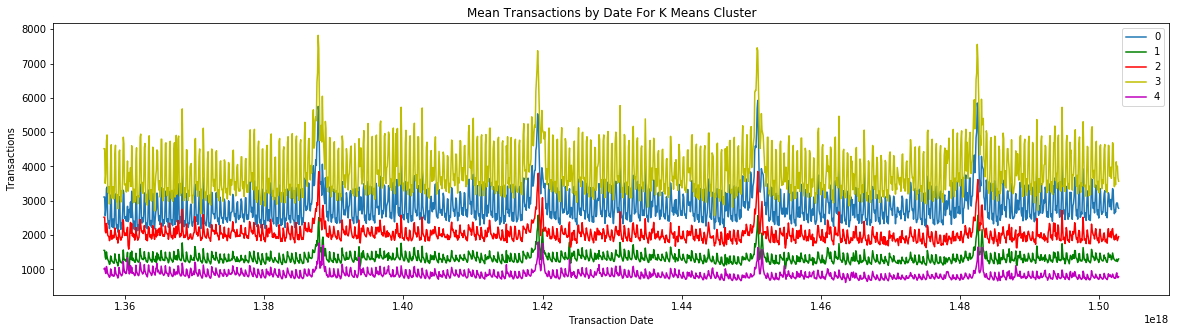

In [39]:
kmeanModel = KMeans(n_clusters=5, max_iter=1000)
kmeanModel.fit(transactions_new)
labels = kmeanModel3.labels_


transactions_im['kcluster5'] = kmeanModel.labels_

transactions0 = transactions_im[transactions_im['kcluster5']==0].drop('kcluster5', axis=1).drop('kcluster6', axis=1).drop('kcluster4', axis=1)
transactions1 = transactions_im[transactions_im['kcluster5']==1].drop('kcluster5', axis=1).drop('kcluster6', axis=1).drop('kcluster4', axis=1)
transactions2 = transactions_im[transactions_im['kcluster5']==2].drop('kcluster5', axis=1).drop('kcluster6', axis=1).drop('kcluster4', axis=1)
transactions3 = transactions_im[transactions_im['kcluster5']==3].drop('kcluster5', axis=1).drop('kcluster6', axis=1).drop('kcluster4', axis=1)
transactions4 = transactions_im[transactions_im['kcluster5']==4].drop('kcluster5', axis=1).drop('kcluster6', axis=1).drop('kcluster4', axis=1)

transactions0 = transactions0.T
transactions1 = transactions1.T
transactions2 = transactions2.T
transactions3 = transactions3.T
transactions4 = transactions4.T


transactions0['mean'] = transactions0.mean(axis=1)
transactions1['mean'] = transactions1.mean(axis=1)
transactions2['mean'] = transactions2.mean(axis=1)
transactions3['mean'] = transactions3.mean(axis=1)
transactions4['mean'] = transactions4.mean(axis=1)

format = '%Y-%m-%d'
transactions0['date'] = transactions0.index.values
transactions0['date'] = transactions0['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
#transactions0 = transactions0.set_index('date')

transactions1['date'] = transactions1.index.values
transactions1['date'] = transactions1['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
#transactions1 = transactions1.set_index('date')

transactions2['date'] = transactions2.index.values
transactions2['date'] = transactions2['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
#transactions2 = transactions2.set_index('date')

transactions3['date'] = transactions3.index.values
transactions3['date'] = transactions3['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
#transactions3 = transactions3.set_index('date')

transactions4['date'] = transactions4.index.values
transactions4['date'] = transactions4['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
#transactions4 = transactions4.set_index('date')


# Plot the results
plt.close('all')
plt.figure(figsize=(20,5))
plt.plot(transactions0['date'], transactions0['mean'], label='0')
plt.plot(transactions1['date'], transactions1['mean'], color='g', label='1')
plt.plot(transactions2['date'], transactions2['mean'], color='r', label='2')
plt.plot(transactions3['date'], transactions3['mean'], color='y', label='3')
plt.plot(transactions4['date'], transactions4['mean'], color='m', label='4')

plt.title('Mean Transactions by Date For K Means Cluster')
plt.xlabel('Transaction Date')
plt.ylabel('Transactions')

plt.legend()
plt.show()

## Conclusion

The clustering using only dates that all stores were open for does give us some overlap in the highest groups, but it assigns the new stores to clusters that will more accurately approximate their values. We are selecting the final model for this method with k = 5 and 1000 iterations.

In [ ]:
with open('/Users/emily-air13/Desktop/code/FavoritaGrocery/Part3-ClusteringandModels/transactionkmeans.pkl', 'wb') as f:
    joblib.dump(kmeanModel, f)


In [13]:
k_means = joblib.load(open('transactionkmeans.pkl', 'rb'))
len(k_means.labels_)

54

In [16]:
transactions = transactions_im.set_index('date').T

In [17]:
transactions['label'] = k_means.labels_

In [20]:
transactions0 = transactions[transactions['label']==0].drop('label', axis=1)
transactions1 = transactions[transactions['label']==1].drop('label', axis=1)
transactions2 = transactions[transactions['label']==2].drop('label', axis=1)
transactions3 = transactions[transactions['label']==3].drop('label', axis=1)
transactions4 = transactions[transactions['label']==4].drop('label', axis=1)


transactions0 = transactions0.T
transactions1 = transactions1.T
transactions2 = transactions2.T
transactions3 = transactions3.T
transactions4 = transactions4.T

In [21]:
transactions0.to_csv('transactions_cluster0.csv')
transactions1.to_csv('transactions_cluster1.csv')
transactions2.to_csv('transactions_cluster2.csv')
transactions3.to_csv('transactions_cluster3.csv')
transactions4.to_csv('transactions_cluster4.csv')